# Lunar Lander Using Reinforcement Learning
![Lunar Lander Gif](https://www.gymlibrary.dev/_images/lunar_lander.gif)

## First Let's Import the Required Libraries

In [1]:
import gymnasium as gym

from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.monitor import Monitor

## How the Gymnasium "Lunar Lander" Works

First let's create the **Lunar Lander-v2** environment from gymnasium

In [2]:
env = gym.make("LunarLander-v2")

#### Action Space
There are four discrete actions available: 
1. Do nothing = 0
2. Fire left orientation engine = 1
3. Fire main engine = 2
4. Fire right orientation engine = 3

In [3]:
for _ in range(10):
    # Take a random action
    action = env.action_space.sample()
    # Print the random action taken
    print("Action taken:", action)
env.close()

Action taken: 2
Action taken: 2
Action taken: 1
Action taken: 0
Action taken: 2
Action taken: 1
Action taken: 3
Action taken: 3
Action taken: 2
Action taken: 1


#### Observation Space
The state is an 8-dimensional vector: the coordinates of the lander in x & y, its linear velocities in x & y, its angle, its angular velocity, and two booleans that represent whether each leg is in contact with the ground or not.

[x, y, linear_vel_x, linear_vel_y, angle, angular_vel, bool_1, bool_2]

In [4]:
# Print the vector dimensions
print("Observation Space Shape =", env.observation_space.shape)
# Print a random observation
print("\nSample Observation =", env.observation_space.sample())

Observation Space Shape = (8,)

Sample Observation = [-1.2251713   0.54171145 -2.1321802   1.6432221   1.7890528  -1.9799854
  0.5112919   0.44466883]


## Untrained Agent Simulation

Let's see how the Lunar Lander simulation runs out-of-the-box with no training.

The **Starting State** of the lander by *DEFAULT* is at the top center of the viewport with a random initial force applied to its center of mass.

In [5]:
env = gym.make("LunarLander-v2", render_mode = "human")
observation, info = env.reset()
# Run the untrained simulation for 1000ms
for _ in range(1000):
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)
    # Reset the sim everytime the lander makes contact with the surface of the moon
    if terminated or truncated:
        observation, info = env.reset()
env.close()

## Vectorize the Environment for Training

An environment is vectorized when we run multiple environments parallely together. A vectorized environment allows for a more diverse experience for our model to train on.

We can vectorize the environment by giving **n_envs** a value (i.e. n_envs = 10 means 10 environments run in parallel at once).

In [6]:
# Create the environment
env = make_vec_env("LunarLander-v2", seed = 100, n_envs = 16)

## Train the Lunar Lander Using the PPO algorithm from the Stable Baselines3 Library

To train our model, we will use the **PPO** (Proximal Policy Optimization) RL algorithm with the **MlpPolicy** (Multi-Layer Perceptron Policy).

A **policy** is a *strategy* that an agent uses in pursuit of its goals. The policy dictates the actions that the agent takes as a function of the agent’s state and the environment.

The **PPO** algorithm is presently considered state-of-the-art in Reinforcement Learning. Therefore, it was selected as the model to train our agent instead of the other available RL algorithms avaialable such as DQN, SAC, and SAC.

![RL Working](https://www.researchgate.net/publication/333884677/figure/fig2/AS:771670948212736@1560992099587/Basic-reinforcement-learning-model-When-the-Agent-performs-an-action-the-state-of-the.png)

#### Define the Model

The tuned hyperparameters were taken from a [github repository](https://github.com/DLR-RM/rl-baselines3-zoo/blob/master/hyperparams/ppo.yml) mainatined by the Stable Baselines3 team. The tuned papameters allow for better and faster training of the model.

In [8]:
model = PPO("MlpPolicy", "LunarLander-v2", verbose=1, tensorboard_log="./Models/")

Using cpu device
Creating environment from the given name 'LunarLander-v2'
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


#### Run the Model for 1 Million Timesteps

In [9]:
model.learn(total_timesteps=1000000, tb_log_name="PPO")

Logging to ./Models/PPO_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 91.1     |
|    ep_rew_mean     | -219     |
| time/              |          |
|    fps             | 1370     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 93          |
|    ep_rew_mean          | -202        |
| time/                   |             |
|    fps                  | 1008        |
|    iterations           | 2           |
|    time_elapsed         | 4           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.004051375 |
|    clip_fraction        | 0.0021      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.38       |
|    explained_variance   | 0.0128      |
|   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 120         |
|    ep_rew_mean          | -123        |
| time/                   |             |
|    fps                  | 803         |
|    iterations           | 11          |
|    time_elapsed         | 28          |
|    total_timesteps      | 22528       |
| train/                  |             |
|    approx_kl            | 0.012774225 |
|    clip_fraction        | 0.135       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.18       |
|    explained_variance   | -0.0213     |
|    learning_rate        | 0.0003      |
|    loss                 | 139         |
|    n_updates            | 100         |
|    policy_gradient_loss | -0.00974    |
|    value_loss           | 426         |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 128 

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 223         |
|    ep_rew_mean          | -67.2       |
| time/                   |             |
|    fps                  | 727         |
|    iterations           | 21          |
|    time_elapsed         | 59          |
|    total_timesteps      | 43008       |
| train/                  |             |
|    approx_kl            | 0.007535882 |
|    clip_fraction        | 0.0779      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.12       |
|    explained_variance   | 0.687       |
|    learning_rate        | 0.0003      |
|    loss                 | 68.7        |
|    n_updates            | 200         |
|    policy_gradient_loss | -0.00749    |
|    value_loss           | 141         |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 242   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 368         |
|    ep_rew_mean          | -59.2       |
| time/                   |             |
|    fps                  | 661         |
|    iterations           | 31          |
|    time_elapsed         | 96          |
|    total_timesteps      | 63488       |
| train/                  |             |
|    approx_kl            | 0.007929334 |
|    clip_fraction        | 0.0501      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1          |
|    explained_variance   | 0.842       |
|    learning_rate        | 0.0003      |
|    loss                 | 40.7        |
|    n_updates            | 300         |
|    policy_gradient_loss | -0.00669    |
|    value_loss           | 67.9        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 379   

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 506          |
|    ep_rew_mean          | -28.3        |
| time/                   |              |
|    fps                  | 617          |
|    iterations           | 41           |
|    time_elapsed         | 136          |
|    total_timesteps      | 83968        |
| train/                  |              |
|    approx_kl            | 0.0100803785 |
|    clip_fraction        | 0.0508       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.782       |
|    explained_variance   | 0.742        |
|    learning_rate        | 0.0003       |
|    loss                 | 73.3         |
|    n_updates            | 400          |
|    policy_gradient_loss | -0.00788     |
|    value_loss           | 148          |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 620         |
|    ep_rew_mean          | 24.9        |
| time/                   |             |
|    fps                  | 597         |
|    iterations           | 51          |
|    time_elapsed         | 174         |
|    total_timesteps      | 104448      |
| train/                  |             |
|    approx_kl            | 0.002893779 |
|    clip_fraction        | 0.0249      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.8        |
|    explained_variance   | 0.625       |
|    learning_rate        | 0.0003      |
|    loss                 | 62.1        |
|    n_updates            | 500         |
|    policy_gradient_loss | -0.00284    |
|    value_loss           | 131         |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 614 

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 561         |
|    ep_rew_mean          | 108         |
| time/                   |             |
|    fps                  | 597         |
|    iterations           | 61          |
|    time_elapsed         | 209         |
|    total_timesteps      | 124928      |
| train/                  |             |
|    approx_kl            | 0.009198569 |
|    clip_fraction        | 0.0997      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.815      |
|    explained_variance   | 0.62        |
|    learning_rate        | 0.0003      |
|    loss                 | 58.5        |
|    n_updates            | 600         |
|    policy_gradient_loss | -0.00512    |
|    value_loss           | 231         |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 538   

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 417          |
|    ep_rew_mean          | 150          |
| time/                   |              |
|    fps                  | 600          |
|    iterations           | 71           |
|    time_elapsed         | 242          |
|    total_timesteps      | 145408       |
| train/                  |              |
|    approx_kl            | 0.0034505622 |
|    clip_fraction        | 0.0147       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.81        |
|    explained_variance   | 0.634        |
|    learning_rate        | 0.0003       |
|    loss                 | 155          |
|    n_updates            | 700          |
|    policy_gradient_loss | -0.00344     |
|    value_loss           | 193          |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 319          |
|    ep_rew_mean          | 160          |
| time/                   |              |
|    fps                  | 607          |
|    iterations           | 81           |
|    time_elapsed         | 272          |
|    total_timesteps      | 165888       |
| train/                  |              |
|    approx_kl            | 0.0042087715 |
|    clip_fraction        | 0.0248       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.77        |
|    explained_variance   | 0.774        |
|    learning_rate        | 0.0003       |
|    loss                 | 241          |
|    n_updates            | 800          |
|    policy_gradient_loss | -0.00142     |
|    value_loss           | 220          |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 296         |
|    ep_rew_mean          | 161         |
| time/                   |             |
|    fps                  | 614         |
|    iterations           | 91          |
|    time_elapsed         | 303         |
|    total_timesteps      | 186368      |
| train/                  |             |
|    approx_kl            | 0.007323462 |
|    clip_fraction        | 0.0646      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.694      |
|    explained_variance   | 0.805       |
|    learning_rate        | 0.0003      |
|    loss                 | 20          |
|    n_updates            | 900         |
|    policy_gradient_loss | -0.00496    |
|    value_loss           | 127         |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 297   

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 389          |
|    ep_rew_mean          | 179          |
| time/                   |              |
|    fps                  | 613          |
|    iterations           | 101          |
|    time_elapsed         | 337          |
|    total_timesteps      | 206848       |
| train/                  |              |
|    approx_kl            | 0.0033060403 |
|    clip_fraction        | 0.0277       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.705       |
|    explained_variance   | 0.799        |
|    learning_rate        | 0.0003       |
|    loss                 | 11.7         |
|    n_updates            | 1000         |
|    policy_gradient_loss | -0.00267     |
|    value_loss           | 47.9         |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 415          |
|    ep_rew_mean          | 201          |
| time/                   |              |
|    fps                  | 617          |
|    iterations           | 111          |
|    time_elapsed         | 368          |
|    total_timesteps      | 227328       |
| train/                  |              |
|    approx_kl            | 0.0037743184 |
|    clip_fraction        | 0.0354       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.728       |
|    explained_variance   | 0.699        |
|    learning_rate        | 0.0003       |
|    loss                 | 150          |
|    n_updates            | 1100         |
|    policy_gradient_loss | -0.0031      |
|    value_loss           | 158          |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 346        |
|    ep_rew_mean          | 209        |
| time/                   |            |
|    fps                  | 620        |
|    iterations           | 121        |
|    time_elapsed         | 399        |
|    total_timesteps      | 247808     |
| train/                  |            |
|    approx_kl            | 0.01392699 |
|    clip_fraction        | 0.129      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.622     |
|    explained_variance   | 0.958      |
|    learning_rate        | 0.0003     |
|    loss                 | 2.97       |
|    n_updates            | 1200       |
|    policy_gradient_loss | -0.0017    |
|    value_loss           | 14.9       |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 347         |
|    ep_rew_m

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 377         |
|    ep_rew_mean          | 208         |
| time/                   |             |
|    fps                  | 623         |
|    iterations           | 131         |
|    time_elapsed         | 430         |
|    total_timesteps      | 268288      |
| train/                  |             |
|    approx_kl            | 0.016964637 |
|    clip_fraction        | 0.0685      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.667      |
|    explained_variance   | 0.905       |
|    learning_rate        | 0.0003      |
|    loss                 | 21.9        |
|    n_updates            | 1300        |
|    policy_gradient_loss | -0.00216    |
|    value_loss           | 49.3        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 382   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 368         |
|    ep_rew_mean          | 210         |
| time/                   |             |
|    fps                  | 625         |
|    iterations           | 141         |
|    time_elapsed         | 461         |
|    total_timesteps      | 288768      |
| train/                  |             |
|    approx_kl            | 0.003556908 |
|    clip_fraction        | 0.0441      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.743      |
|    explained_variance   | 0.821       |
|    learning_rate        | 0.0003      |
|    loss                 | 16.7        |
|    n_updates            | 1400        |
|    policy_gradient_loss | -0.00238    |
|    value_loss           | 31.7        |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 364 

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 322          |
|    ep_rew_mean          | 236          |
| time/                   |              |
|    fps                  | 629          |
|    iterations           | 151          |
|    time_elapsed         | 491          |
|    total_timesteps      | 309248       |
| train/                  |              |
|    approx_kl            | 0.0032681378 |
|    clip_fraction        | 0.0625       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.741       |
|    explained_variance   | 0.696        |
|    learning_rate        | 0.0003       |
|    loss                 | 28.4         |
|    n_updates            | 1500         |
|    policy_gradient_loss | -0.000613    |
|    value_loss           | 86.4         |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 310         |
|    ep_rew_mean          | 228         |
| time/                   |             |
|    fps                  | 631         |
|    iterations           | 161         |
|    time_elapsed         | 521         |
|    total_timesteps      | 329728      |
| train/                  |             |
|    approx_kl            | 0.002887663 |
|    clip_fraction        | 0.0209      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.718      |
|    explained_variance   | 0.579       |
|    learning_rate        | 0.0003      |
|    loss                 | 169         |
|    n_updates            | 1600        |
|    policy_gradient_loss | -0.00134    |
|    value_loss           | 154         |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 295   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 314         |
|    ep_rew_mean          | 229         |
| time/                   |             |
|    fps                  | 633         |
|    iterations           | 171         |
|    time_elapsed         | 552         |
|    total_timesteps      | 350208      |
| train/                  |             |
|    approx_kl            | 0.008970505 |
|    clip_fraction        | 0.0532      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.663      |
|    explained_variance   | 0.93        |
|    learning_rate        | 0.0003      |
|    loss                 | 7.06        |
|    n_updates            | 1700        |
|    policy_gradient_loss | -0.00367    |
|    value_loss           | 133         |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 321 

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 297         |
|    ep_rew_mean          | 229         |
| time/                   |             |
|    fps                  | 636         |
|    iterations           | 181         |
|    time_elapsed         | 582         |
|    total_timesteps      | 370688      |
| train/                  |             |
|    approx_kl            | 0.004856337 |
|    clip_fraction        | 0.0545      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.669      |
|    explained_variance   | 0.406       |
|    learning_rate        | 0.0003      |
|    loss                 | 12.7        |
|    n_updates            | 1800        |
|    policy_gradient_loss | -0.0015     |
|    value_loss           | 119         |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 295   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 283         |
|    ep_rew_mean          | 244         |
| time/                   |             |
|    fps                  | 639         |
|    iterations           | 191         |
|    time_elapsed         | 611         |
|    total_timesteps      | 391168      |
| train/                  |             |
|    approx_kl            | 0.007863388 |
|    clip_fraction        | 0.0717      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.635      |
|    explained_variance   | 0.884       |
|    learning_rate        | 0.0003      |
|    loss                 | 5.9         |
|    n_updates            | 1900        |
|    policy_gradient_loss | -0.00369    |
|    value_loss           | 13.6        |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 279 

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 263          |
|    ep_rew_mean          | 243          |
| time/                   |              |
|    fps                  | 642          |
|    iterations           | 201          |
|    time_elapsed         | 640          |
|    total_timesteps      | 411648       |
| train/                  |              |
|    approx_kl            | 0.0037571327 |
|    clip_fraction        | 0.0401       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.561       |
|    explained_variance   | 0.69         |
|    learning_rate        | 0.0003       |
|    loss                 | 10.3         |
|    n_updates            | 2000         |
|    policy_gradient_loss | -0.00298     |
|    value_loss           | 82.9         |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 253          |
|    ep_rew_mean          | 245          |
| time/                   |              |
|    fps                  | 644          |
|    iterations           | 211          |
|    time_elapsed         | 670          |
|    total_timesteps      | 432128       |
| train/                  |              |
|    approx_kl            | 0.0026261485 |
|    clip_fraction        | 0.0126       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.623       |
|    explained_variance   | 0.606        |
|    learning_rate        | 0.0003       |
|    loss                 | 53.6         |
|    n_updates            | 2100         |
|    policy_gradient_loss | -0.000432    |
|    value_loss           | 162          |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 264         |
|    ep_rew_mean          | 257         |
| time/                   |             |
|    fps                  | 647         |
|    iterations           | 221         |
|    time_elapsed         | 699         |
|    total_timesteps      | 452608      |
| train/                  |             |
|    approx_kl            | 0.008602499 |
|    clip_fraction        | 0.054       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.618      |
|    explained_variance   | 0.633       |
|    learning_rate        | 0.0003      |
|    loss                 | 41.5        |
|    n_updates            | 2200        |
|    policy_gradient_loss | -0.00268    |
|    value_loss           | 84.2        |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 265     

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 277          |
|    ep_rew_mean          | 240          |
| time/                   |              |
|    fps                  | 649          |
|    iterations           | 231          |
|    time_elapsed         | 728          |
|    total_timesteps      | 473088       |
| train/                  |              |
|    approx_kl            | 0.0039302325 |
|    clip_fraction        | 0.0507       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.619       |
|    explained_variance   | 0.977        |
|    learning_rate        | 0.0003       |
|    loss                 | 6.46         |
|    n_updates            | 2300         |
|    policy_gradient_loss | -0.000892    |
|    value_loss           | 23.9         |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 282         |
|    ep_rew_mean          | 249         |
| time/                   |             |
|    fps                  | 651         |
|    iterations           | 241         |
|    time_elapsed         | 758         |
|    total_timesteps      | 493568      |
| train/                  |             |
|    approx_kl            | 0.003235285 |
|    clip_fraction        | 0.0357      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.649      |
|    explained_variance   | 0.294       |
|    learning_rate        | 0.0003      |
|    loss                 | 38.9        |
|    n_updates            | 2400        |
|    policy_gradient_loss | -0.000783   |
|    value_loss           | 186         |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 275   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 263         |
|    ep_rew_mean          | 267         |
| time/                   |             |
|    fps                  | 653         |
|    iterations           | 251         |
|    time_elapsed         | 786         |
|    total_timesteps      | 514048      |
| train/                  |             |
|    approx_kl            | 0.011474715 |
|    clip_fraction        | 0.0776      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.615      |
|    explained_variance   | 0.877       |
|    learning_rate        | 0.0003      |
|    loss                 | 3.98        |
|    n_updates            | 2500        |
|    policy_gradient_loss | -0.00538    |
|    value_loss           | 12.4        |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 263 

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 273          |
|    ep_rew_mean          | 271          |
| time/                   |              |
|    fps                  | 655          |
|    iterations           | 261          |
|    time_elapsed         | 815          |
|    total_timesteps      | 534528       |
| train/                  |              |
|    approx_kl            | 0.0033396357 |
|    clip_fraction        | 0.0327       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.584       |
|    explained_variance   | 0.844        |
|    learning_rate        | 0.0003       |
|    loss                 | 3.55         |
|    n_updates            | 2600         |
|    policy_gradient_loss | -0.00126     |
|    value_loss           | 15.6         |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 290          |
|    ep_rew_mean          | 258          |
| time/                   |              |
|    fps                  | 656          |
|    iterations           | 271          |
|    time_elapsed         | 845          |
|    total_timesteps      | 555008       |
| train/                  |              |
|    approx_kl            | 0.0042306376 |
|    clip_fraction        | 0.0372       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.582       |
|    explained_variance   | 0.854        |
|    learning_rate        | 0.0003       |
|    loss                 | 3.04         |
|    n_updates            | 2700         |
|    policy_gradient_loss | -0.000883    |
|    value_loss           | 14.7         |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 277          |
|    ep_rew_mean          | 262          |
| time/                   |              |
|    fps                  | 657          |
|    iterations           | 281          |
|    time_elapsed         | 874          |
|    total_timesteps      | 575488       |
| train/                  |              |
|    approx_kl            | 0.0036058696 |
|    clip_fraction        | 0.041        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.54        |
|    explained_variance   | 0.831        |
|    learning_rate        | 0.0003       |
|    loss                 | 2.61         |
|    n_updates            | 2800         |
|    policy_gradient_loss | -0.000724    |
|    value_loss           | 13.6         |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 286         |
|    ep_rew_mean          | 255         |
| time/                   |             |
|    fps                  | 658         |
|    iterations           | 291         |
|    time_elapsed         | 905         |
|    total_timesteps      | 595968      |
| train/                  |             |
|    approx_kl            | 0.002580358 |
|    clip_fraction        | 0.0236      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.553      |
|    explained_variance   | 0.552       |
|    learning_rate        | 0.0003      |
|    loss                 | 2.69        |
|    n_updates            | 2900        |
|    policy_gradient_loss | -0.00135    |
|    value_loss           | 48.2        |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 286 

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 280          |
|    ep_rew_mean          | 260          |
| time/                   |              |
|    fps                  | 659          |
|    iterations           | 301          |
|    time_elapsed         | 934          |
|    total_timesteps      | 616448       |
| train/                  |              |
|    approx_kl            | 0.0048754634 |
|    clip_fraction        | 0.0774       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.561       |
|    explained_variance   | 0.877        |
|    learning_rate        | 0.0003       |
|    loss                 | 2.32         |
|    n_updates            | 3000         |
|    policy_gradient_loss | -0.00246     |
|    value_loss           | 10.5         |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 275         |
|    ep_rew_mean          | 264         |
| time/                   |             |
|    fps                  | 661         |
|    iterations           | 311         |
|    time_elapsed         | 963         |
|    total_timesteps      | 636928      |
| train/                  |             |
|    approx_kl            | 0.004463678 |
|    clip_fraction        | 0.0359      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.549      |
|    explained_variance   | 0.513       |
|    learning_rate        | 0.0003      |
|    loss                 | 7.01        |
|    n_updates            | 3100        |
|    policy_gradient_loss | -0.00082    |
|    value_loss           | 108         |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 274 

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 260          |
|    ep_rew_mean          | 265          |
| time/                   |              |
|    fps                  | 662          |
|    iterations           | 321          |
|    time_elapsed         | 992          |
|    total_timesteps      | 657408       |
| train/                  |              |
|    approx_kl            | 0.0056365225 |
|    clip_fraction        | 0.0712       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.546       |
|    explained_variance   | 0.935        |
|    learning_rate        | 0.0003       |
|    loss                 | 3.87         |
|    n_updates            | 3200         |
|    policy_gradient_loss | -0.0014      |
|    value_loss           | 6.97         |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 273          |
|    ep_rew_mean          | 273          |
| time/                   |              |
|    fps                  | 663          |
|    iterations           | 331          |
|    time_elapsed         | 1021         |
|    total_timesteps      | 677888       |
| train/                  |              |
|    approx_kl            | 0.0074165985 |
|    clip_fraction        | 0.0734       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.553       |
|    explained_variance   | 0.902        |
|    learning_rate        | 0.0003       |
|    loss                 | 2.24         |
|    n_updates            | 3300         |
|    policy_gradient_loss | -0.00249     |
|    value_loss           | 7.28         |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 257          |
|    ep_rew_mean          | 269          |
| time/                   |              |
|    fps                  | 665          |
|    iterations           | 341          |
|    time_elapsed         | 1048         |
|    total_timesteps      | 698368       |
| train/                  |              |
|    approx_kl            | 0.0030037486 |
|    clip_fraction        | 0.0316       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.511       |
|    explained_variance   | 0.81         |
|    learning_rate        | 0.0003       |
|    loss                 | 6.92         |
|    n_updates            | 3400         |
|    policy_gradient_loss | -0.00244     |
|    value_loss           | 18.5         |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 271        |
|    ep_rew_mean          | 272        |
| time/                   |            |
|    fps                  | 666        |
|    iterations           | 351        |
|    time_elapsed         | 1077       |
|    total_timesteps      | 718848     |
| train/                  |            |
|    approx_kl            | 0.01479947 |
|    clip_fraction        | 0.0585     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.58      |
|    explained_variance   | 0.967      |
|    learning_rate        | 0.0003     |
|    loss                 | 4.14       |
|    n_updates            | 3500       |
|    policy_gradient_loss | -0.00156   |
|    value_loss           | 11.2       |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 271         |
|    ep_rew_m

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 293          |
|    ep_rew_mean          | 261          |
| time/                   |              |
|    fps                  | 667          |
|    iterations           | 361          |
|    time_elapsed         | 1107         |
|    total_timesteps      | 739328       |
| train/                  |              |
|    approx_kl            | 0.0033137135 |
|    clip_fraction        | 0.0823       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.619       |
|    explained_variance   | 0.966        |
|    learning_rate        | 0.0003       |
|    loss                 | 3.8          |
|    n_updates            | 3600         |
|    policy_gradient_loss | -0.00111     |
|    value_loss           | 18.2         |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 321          |
|    ep_rew_mean          | 246          |
| time/                   |              |
|    fps                  | 668          |
|    iterations           | 371          |
|    time_elapsed         | 1137         |
|    total_timesteps      | 759808       |
| train/                  |              |
|    approx_kl            | 0.0053351475 |
|    clip_fraction        | 0.0679       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.602       |
|    explained_variance   | 0.98         |
|    learning_rate        | 0.0003       |
|    loss                 | 1.81         |
|    n_updates            | 3700         |
|    policy_gradient_loss | 0.000857     |
|    value_loss           | 6.89         |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 314         |
|    ep_rew_mean          | 255         |
| time/                   |             |
|    fps                  | 668         |
|    iterations           | 381         |
|    time_elapsed         | 1166        |
|    total_timesteps      | 780288      |
| train/                  |             |
|    approx_kl            | 0.026681766 |
|    clip_fraction        | 0.143       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.523      |
|    explained_variance   | 0.987       |
|    learning_rate        | 0.0003      |
|    loss                 | 2.67        |
|    n_updates            | 3800        |
|    policy_gradient_loss | -0.00316    |
|    value_loss           | 6.58        |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 322     

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 288          |
|    ep_rew_mean          | 266          |
| time/                   |              |
|    fps                  | 670          |
|    iterations           | 391          |
|    time_elapsed         | 1194         |
|    total_timesteps      | 800768       |
| train/                  |              |
|    approx_kl            | 0.0080113625 |
|    clip_fraction        | 0.0675       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.511       |
|    explained_variance   | 0.899        |
|    learning_rate        | 0.0003       |
|    loss                 | 6.55         |
|    n_updates            | 3900         |
|    policy_gradient_loss | -0.00198     |
|    value_loss           | 8.76         |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 257         |
|    ep_rew_mean          | 270         |
| time/                   |             |
|    fps                  | 671         |
|    iterations           | 401         |
|    time_elapsed         | 1223        |
|    total_timesteps      | 821248      |
| train/                  |             |
|    approx_kl            | 0.009041899 |
|    clip_fraction        | 0.0518      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.442      |
|    explained_variance   | 0.866       |
|    learning_rate        | 0.0003      |
|    loss                 | 9.86        |
|    n_updates            | 4000        |
|    policy_gradient_loss | -0.00395    |
|    value_loss           | 18.7        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 256   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 282         |
|    ep_rew_mean          | 260         |
| time/                   |             |
|    fps                  | 671         |
|    iterations           | 411         |
|    time_elapsed         | 1253        |
|    total_timesteps      | 841728      |
| train/                  |             |
|    approx_kl            | 0.015315564 |
|    clip_fraction        | 0.141       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.598      |
|    explained_variance   | 0.983       |
|    learning_rate        | 0.0003      |
|    loss                 | 7.17        |
|    n_updates            | 4100        |
|    policy_gradient_loss | -0.00458    |
|    value_loss           | 9.24        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 284   

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 278          |
|    ep_rew_mean          | 267          |
| time/                   |              |
|    fps                  | 672          |
|    iterations           | 421          |
|    time_elapsed         | 1281         |
|    total_timesteps      | 862208       |
| train/                  |              |
|    approx_kl            | 0.0061946977 |
|    clip_fraction        | 0.0538       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.474       |
|    explained_variance   | 0.711        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.47         |
|    n_updates            | 4200         |
|    policy_gradient_loss | -0.00114     |
|    value_loss           | 35.8         |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 244          |
|    ep_rew_mean          | 273          |
| time/                   |              |
|    fps                  | 674          |
|    iterations           | 431          |
|    time_elapsed         | 1309         |
|    total_timesteps      | 882688       |
| train/                  |              |
|    approx_kl            | 0.0066761477 |
|    clip_fraction        | 0.0641       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.445       |
|    explained_variance   | 0.874        |
|    learning_rate        | 0.0003       |
|    loss                 | 6.12         |
|    n_updates            | 4300         |
|    policy_gradient_loss | -0.00183     |
|    value_loss           | 9.01         |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 253          |
|    ep_rew_mean          | 272          |
| time/                   |              |
|    fps                  | 675          |
|    iterations           | 441          |
|    time_elapsed         | 1336         |
|    total_timesteps      | 903168       |
| train/                  |              |
|    approx_kl            | 0.0052601765 |
|    clip_fraction        | 0.0602       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.452       |
|    explained_variance   | 0.874        |
|    learning_rate        | 0.0003       |
|    loss                 | 3.5          |
|    n_updates            | 4400         |
|    policy_gradient_loss | -0.00168     |
|    value_loss           | 11.5         |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 261          |
|    ep_rew_mean          | 268          |
| time/                   |              |
|    fps                  | 676          |
|    iterations           | 451          |
|    time_elapsed         | 1366         |
|    total_timesteps      | 923648       |
| train/                  |              |
|    approx_kl            | 0.0064448016 |
|    clip_fraction        | 0.0633       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.48        |
|    explained_variance   | 0.989        |
|    learning_rate        | 0.0003       |
|    loss                 | 5.9          |
|    n_updates            | 4500         |
|    policy_gradient_loss | -0.00298     |
|    value_loss           | 9.22         |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 244         |
|    ep_rew_mean          | 261         |
| time/                   |             |
|    fps                  | 677         |
|    iterations           | 461         |
|    time_elapsed         | 1393        |
|    total_timesteps      | 944128      |
| train/                  |             |
|    approx_kl            | 0.008189958 |
|    clip_fraction        | 0.0748      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.42       |
|    explained_variance   | 0.788       |
|    learning_rate        | 0.0003      |
|    loss                 | 14.6        |
|    n_updates            | 4600        |
|    policy_gradient_loss | -0.0028     |
|    value_loss           | 47.6        |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 244 

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 274          |
|    ep_rew_mean          | 258          |
| time/                   |              |
|    fps                  | 678          |
|    iterations           | 471          |
|    time_elapsed         | 1422         |
|    total_timesteps      | 964608       |
| train/                  |              |
|    approx_kl            | 0.0070089097 |
|    clip_fraction        | 0.0713       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.493       |
|    explained_variance   | 0.988        |
|    learning_rate        | 0.0003       |
|    loss                 | 4.53         |
|    n_updates            | 4700         |
|    policy_gradient_loss | -0.00186     |
|    value_loss           | 15           |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 272         |
|    ep_rew_mean          | 265         |
| time/                   |             |
|    fps                  | 679         |
|    iterations           | 481         |
|    time_elapsed         | 1450        |
|    total_timesteps      | 985088      |
| train/                  |             |
|    approx_kl            | 0.004568951 |
|    clip_fraction        | 0.0513      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.394      |
|    explained_variance   | 0.883       |
|    learning_rate        | 0.0003      |
|    loss                 | 3.96        |
|    n_updates            | 4800        |
|    policy_gradient_loss | -0.00225    |
|    value_loss           | 13.3        |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 263 

#### Save the Model

In [10]:
model_name = "ppo-LunarLander-v2___tensorboard"
model.save(model_name)

## The Lunar Lander Reward Function

A **Reward Function** is a function that gives the agent a reward at each timestep.

The total reward of an episode (all the actions/observations that take place between each environment reset) is the sum of the rewards for all the steps within that episode.

For each step, the reward:

- is increased/decreased the closer/further the lander is to the landing pad.
- is increased/decreased the slower/faster the lander is moving.
- is decreased the more the lander is tilted (angle not horizontal).
- is increased by 10 points for each leg that is in contact with the ground.
- is decreased by 0.03 points each frame a side engine is firing.
- is decreased by 0.3 points each frame the main engine is firing.

The episode receive an additional reward of -100 or +100 points for crashing or landing safely respectively.

An episode is considered a solution if it scores **at least** 200 points.

## Evaluate the Agent Post Training

In [11]:
#Load our trained model
model = PPO.load("ppo-LunarLander-v2___tensorboard", env = env)

In [12]:
# Create an evaluation environment
eval_env = Monitor(gym.make("LunarLander-v2"))
mean_reward, std_reward = evaluate_policy(model, eval_env, n_eval_episodes=10, deterministic=True)
print(f"Mean Reward = {mean_reward:.2f} +/- {std_reward}")

Mean Reward = 278.80 +/- 16.232086404303825


## Model Performance

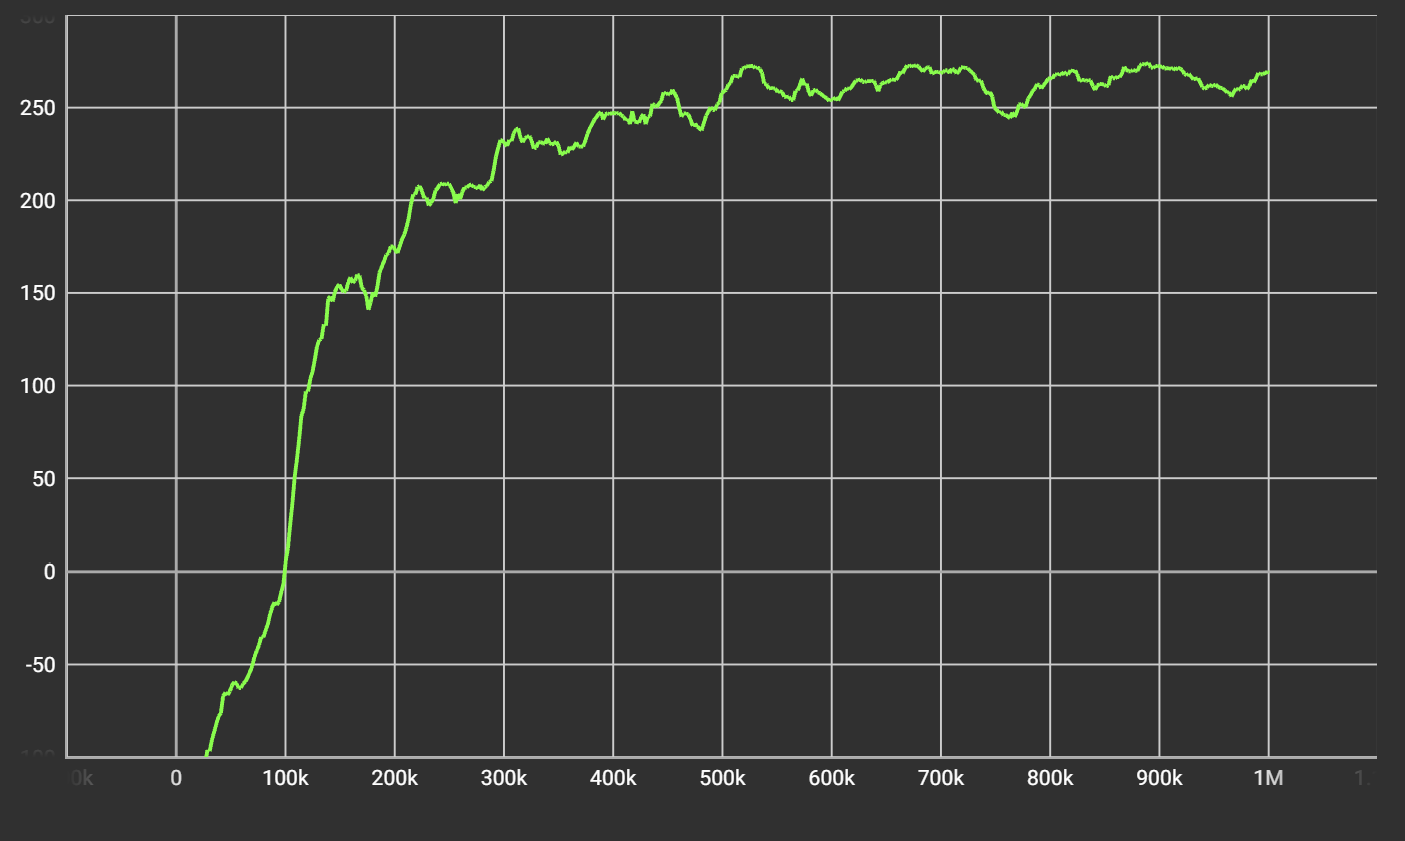

We can see that the reward increases as the number of timesteps increase.

## Trained Agent Simulation

In [13]:
model = PPO.load("ppo-LunarLander-v2___tensorboard", env = env)

env = gym.make("LunarLander-v2", render_mode = "human")

observation, info = env.reset()

for _ in range(400):
    env.render()
    action, _ = model.predict(observation)
    observation, reward, terminated, truncated, info = env.step(action)
    # Reset the sim everytime the lander makes contact with the surface of the moon
    if terminated or truncated:
        observation, info = env.reset()
env.close()